In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

I set $g=0.02$ in the question. 

In [2]:
def euler_method(s = 0.3, 
                 alpha = 0.33, 
                 delta = 0.1, 
                 nrate = 0.03, 
                 g = 0.02, 
                 k0 = 0.5, 
                 ab = [0.,100.], 
                 n = 1000):

    tfp = 1 # A^{1-\alpha}. I take this value arbitrarily

   
    h = (ab[1]-ab[0])/n
    
    
    kvec = np.zeros(n)
    tvec = np.zeros(n)
    kvec[0] = k0
    
    func = lambda x,t : s * (tfp ** (1-alpha)) * np.exp((1-alpha)*g*t)*x**alpha-(delta+nrate)*x
    
    for i in range(n-1):
        kvec[i+1] = kvec[i] + h*func(kvec[i], tvec[i])
        tvec[i+1] = tvec[i] + h
    return kvec, tvec

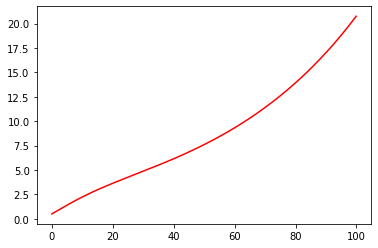

In [3]:
kvec, tvec = euler_method(n=1000)
plt.plot(tvec, kvec,'r-')
plt.show()

In [4]:
def runge_4(s = 0.3, 
                 alpha = 0.33, 
                 delta = 0.1, 
                 nrate = 0.03, 
                 g = 0.02, 
                 k0 = 0.5, 
                 ab = [0.,100.], 
                 n = 1000):

    tfp = 1  # A^{1-\alpha}. I take this value arbitrarily

   
    h = (ab[1]-ab[0])/n
    
    
    kvec = np.zeros(n)
    tvec = np.zeros(n)
    kvec[0] = k0
    
    func = lambda x,t : s* (tfp ** (1-alpha)) *np.exp((1-alpha)*g*t)*x**alpha-(delta+nrate)*x
    
    for i in range(n-1):
        z1 = func(kvec[i],tvec[i])
        z2 = func(kvec[i] + 0.5 * h * z1, tvec[i] + h/2)
        z3 = func(kvec[i] + 0.5 * h * z2, tvec[i] + h/2)
        z4 = func(kvec[i] + h * z3,tvec[i] + h)
        kvec[i+1] = kvec[i] + (h / 6) * (z1+ 2 * z2 + 2 * z3 + z4)
        tvec[i+1] = tvec[i] + h
    return kvec, tvec

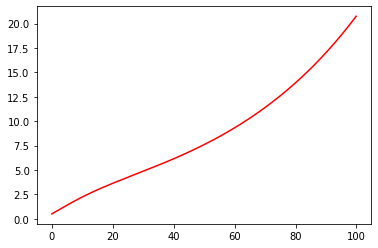

In [5]:
kvec, tvec = runge_4(n=1000)
plt.plot(tvec, kvec,'r-')
plt.show()

In order to compare results for different $n$ values, I keep $n$ sufficiently high and assume it is good approximation that is very close to true value:

In [6]:
kvec_true, tvec_true = runge_4(n=10000)

In [7]:
n_list = [100, 50, 20, 15, 10, 5, 4]

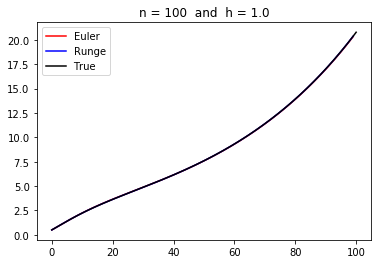

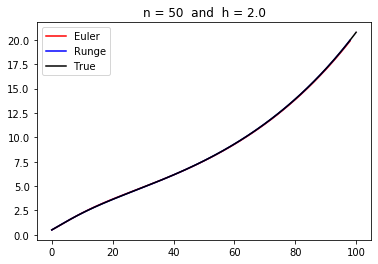

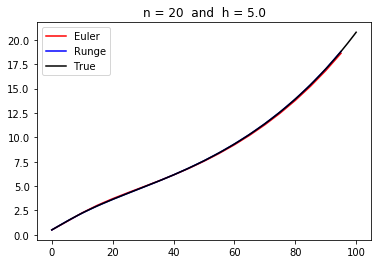

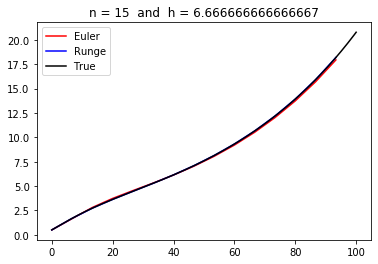

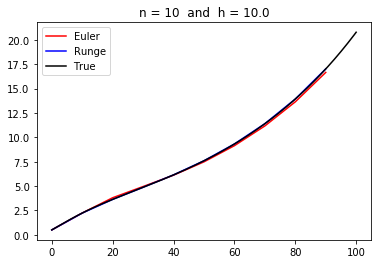

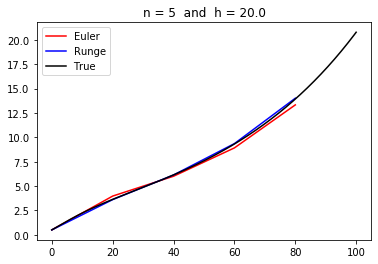

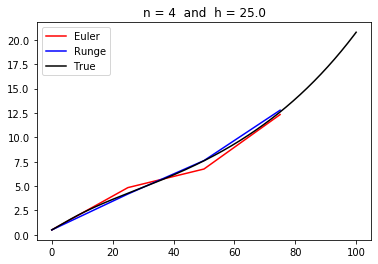

In [8]:
for i in n_list:
    kvecr, tvecr = runge_4(n=i)
    kvece, tvece = euler_method(n=i)
    plt.title('n = '+str(i)  + '  and  h = ' + str(100/i))
    plt.plot(tvece, kvece, 'r-',label = 'Euler')
    plt.plot(tvecr, kvecr, 'b-', label = 'Runge')
    plt.plot(tvec_true, kvec_true, 'black', label = 'True')
    plt.legend()
    plt.show()

It looks like Euler deteriorates more easily than Runge. The deterioration of Euler method can be observed from plots when $h=2$ whereas Runge's starts to deteriates only after $h=10$. 

# Question 2

### Brief summary of the Lecture 10

We consider the following differential equation:

$$ d'(x) + d(x) = 0 $$

for $x \in [0,T]$ and  

$$ d(0) = 1. $$

This example is taken from McGrattan's paper, with $T=6$.

The solution is $d(x) = \exp(-x)$.

The idea here is to approximate the function $d$ with 

$$ d^n(x;\theta) := \sum_{i=0}^n \theta_i \psi_i(x),$$

where $\{\psi_i\}_{i=0}^n$ is a set of known basis functions.

## Part A
*For general T, what is the $(j, i)$-element of $A^{\text{Gal}}$? What is the j-the element of $b^{\text{Gal}}$?*

----

So approximate function $d$ with

$$ d^n(x;\theta) := \sum_{i=0}^n \theta_i \psi_i(x) = \sum_{i=0}^n \theta_i x^i,$$

Here basis function is monomials $\psi_i(x) = x^i$ for $i=0,1,2...$

\begin{eqnarray}
R(x;\theta) &=&(d^n)'(x;\theta) + d^n(x;\theta)&=&
 \sum_{i=1}^n \theta_i (ix^{i-1} +x^i) +1.
\end{eqnarray}

The Galerkin method requires:

$$ \int_0^T R(x;\theta)\psi_j(x) dx=0 $$

where $\psi_j(x) = x_j$, so:

$$ \int_0^T R(x;\theta)x^j dx=0 $$

Solving it:

$$
\begin{array}
\int _0 ^T R(x;\theta)x^j dx &= \int_0^T \left[\sum_{i=1}^n \theta_i(ix^{i-1}+x^{i})+1)x^{j} \right]dx\\
&= \int_0^T \left[\sum_{i=1}^n \theta_i(ix^{i-1}+x^{i})x^{j} \right]dx + \frac{T^{j+1}}{j+1}\\
&= \sum_{i=1}^n \theta_i\int_0^T \left[ix^{i+j-1}+x^{i+j} \right]dx + \frac{T^{j+1}}{j+1}\\
&= \sum_{i=1}^n \theta_i\left[\frac{i}{i+j}T^{i+j} + \frac{1}{i+j+1}T^{i+j+1}\right] + \frac{T^{j+1}}{j+1}\\
&=  0\\
\end{array}
$$

Therefore:

$$ A^{Gal} \left[\begin{array}{c}
        \theta_1 \\
        \vdots\\
        \theta_n
        \end{array}\right] = \left[\begin{array}{c}
        -(\frac{T^{2}}{2}) \\
        \vdots\\
        -(\frac{T^{n+1}}{n+1})
        \end{array}\right] = b^{Gal}, $$

$(j,i)$-element of $A^{Gal}$: $\left[\frac{i}{i+j}T^{i+j} + \frac{1}{i+j+1}T^{i+j+1}\right]$

$(j,i)$-element of $b^{Gal}$: $\left[-(\frac{T^{j+1}}{j+1})\right]$ .

## Part B

*Solve the model using the Galerkin method and compare the results with those of the Leastsquare and the collocation methods, for $n = 3$ and $n = 5$.*

---

The true function is $d(x) = \exp(-x)$. So:

In [9]:
T = 6.0 # The domain is [0,6]
x_gr_fine = np.linspace(0.0, T, 1000)
sol_true = np.exp(-x_gr_fine)

I will define functions for Galerkin, Least squares and Collocation methods.

Galerkin Method  function:

In [10]:
def galerkin(n, T = T):
    A = np.empty((n,n))
    b = np.empty(n)

    for j in range(1,n+1):
        b[j-1] = -(T**(j+1)/(j+1))
        for i in range(1,n+1):
            A[j-1,i-1] = (i * T**(i+j))/(j+i) + T**(i+j+1)/(j+i+1)

    theta = np.empty(n+1)    
    theta[0] = 1.0
    theta[1:] = np.linalg.solve(A,b)
    return theta

The least squares method function:

In [11]:
def ls(n, T = T):
    A = np.empty((n,n))
    b = np.empty(n)

    for j in range(1,n+1):
        b[j-1] = -(T**(j) + T**(j+1)/(j+1))
        for i in range(1,n+1):
            A[j-1,i-1] = T**(i+j+1)/(i+j+1) + i*j*T**(i+j-1)/(i+j-1) + T**(i+j)

    theta = np.empty(n+1)    
    theta[0] = 1.0
    theta[1:] = np.linalg.solve(A,b)
    return theta

Collocation method function:

In [12]:
def col(n):
    xgrid = np.linspace(0.0, T, n) 
    
    A = np.empty((n,n))
    b = - np.ones(n)
    
    for j in range(1,n+1):
        for i in range(1,n+1):
            A[j-1,i-1] = i*xgrid[j-1]**(i-1) + xgrid[j-1]**i

    theta = np.empty(n+1)    
    theta[0] = 1.0
    theta[1:] = np.linalg.solve(A,b)
    
    return theta

Evaluation function:

In [13]:
def poly_eval(x, coef):
    P = 0.0
    for coef in coef[::-1]:
        P = coef+P*x   
    return P

Let's compare results of methods. When $n=3$:

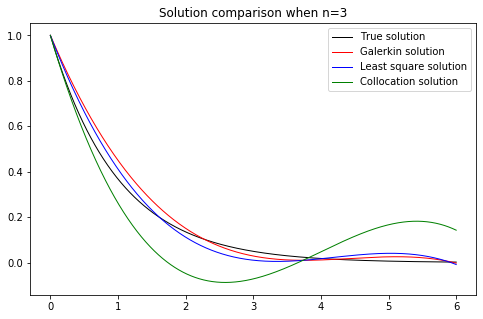

In [14]:
n = 3

sol_ga = poly_eval(x_gr_fine,galerkin(n))
sol_ls = poly_eval(x_gr_fine,ls(n))
sol_col = poly_eval(x_gr_fine,col(n))
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(x_gr_fine, sol_true, 'k-', linewidth=1, label='True solution')
ax1.plot(x_gr_fine, sol_ga, 'r-', linewidth=1, label='Galerkin solution')
ax1.plot(x_gr_fine, sol_ls, 'b-', linewidth=1, label='Least square solution')
ax1.plot(x_gr_fine, sol_col, 'g-', linewidth=1, label='Collocation solution')
ax1.legend(loc='upper right')
ax1.set_title('Solution comparison when n='+str(n))
plt.show()

When $n=5$:

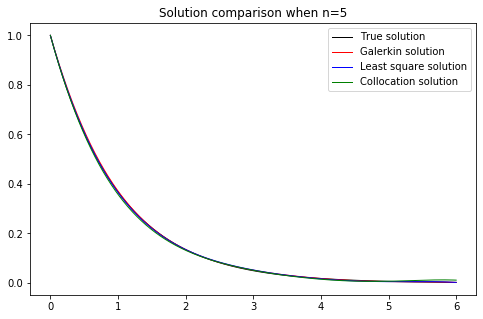

In [15]:
n = 5

sol_ga = poly_eval(x_gr_fine,galerkin(n))
sol_ls = poly_eval(x_gr_fine,ls(n))
sol_col = poly_eval(x_gr_fine,col(n))
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(x_gr_fine, sol_true, 'k-', linewidth=1, label='True solution')
ax1.plot(x_gr_fine, sol_ga, 'r-', linewidth=1, label='Galerkin solution')
ax1.plot(x_gr_fine, sol_ls, 'b-', linewidth=1, label='Least square solution')
ax1.plot(x_gr_fine, sol_col, 'g-', linewidth=1, label='Collocation solution')
ax1.legend(loc='upper right')
ax1.set_title('Solution comparison when n='+str(n))
plt.show()

When we make $n=5$ all methods perform well. However there methods perform differently when $n=3$. Let's compare the errors:

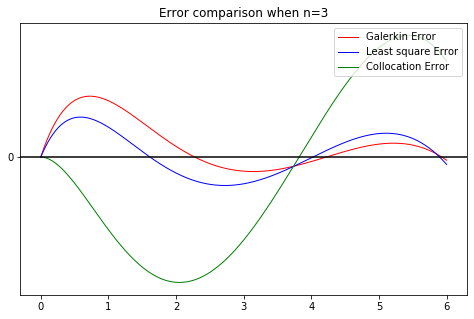

In [16]:
n = 3

sol_ga = poly_eval(x_gr_fine,galerkin(n))
sol_ls = poly_eval(x_gr_fine,ls(n))
sol_col = poly_eval(x_gr_fine,col(n))

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(x_gr_fine, sol_ga - sol_true, 'r-', linewidth=1, label='Galerkin Error')
ax1.plot(x_gr_fine, sol_ls - sol_true, 'b-', linewidth=1, label='Least square Error')
ax1.plot(x_gr_fine, sol_col - sol_true, 'g-', linewidth=1, label='Collocation Error')
ax1.axhline(y='0', color= 'black')
ax1.legend(loc='upper right')
ax1.set_title('Error comparison when n='+str(n))
plt.show()

In general, Collocation performs poor and LS and Galerken methods are relatively better. Mean squared errors are:

In [17]:
print('Galerkin MSE:', (np.square(sol_ga - sol_true) / len(sol_true)).mean())
print('Least Squares MSE:', (np.square(sol_ls - sol_true) / len(sol_true)).mean())
print('Collocation MSE:', (np.square(sol_col - sol_true) / len(sol_true)).mean())

Galerkin MSE: 1.5200059579875705e-06
Least Squares MSE: 1.0008089519070204e-06
Collocation MSE: 1.6499737564581302e-05


# Question 3

### Part A

*In Step 3, why do we update $c_H = c_0$ and start over if $k_{t+1} < k_t$ at some point $t$, and why do we update $c_L = c_0$ and start over if $c_{t+1} < c_t$ at some point $t$?*

---

![](https://raw.githubusercontent.com/alfurka/ECON8080/master/phasediagram.jpg)

The answer can be observed from the [Phase diagram](https://raw.githubusercontent.com/alfurka/ECON8080/master/phasediagram.jpg) of Ramsey model. When we shoot for $c_0$ such that $c_0 < c_0^*$, it will not converge to true $c^*$ and $k^*$. After $k>k^*$, $c$ will start to decrease, therefore we update $c_L = c_0$. It is illusrated above. When we start from point D, consumption level starts to decrease. So we know that solution is no less than D. 

When we shoot greater than true $c_0^*$, above the $\dot{k} = 0$ line capital level starts to decrease. It can be observed in shoots A, B, C. Therefore we update the $c_H = c_0$ because we know that $c_0^*<c_0$. 

After repeating this process enough, it will eventually converge to point F. 

### Part B

*Implementing algorithm*:

---

Parameters:

In [18]:
beta = 0.99
sigma = 1.5
delta = 0.11
a = 0.3
g = 0.15
k0 = 0.5
tfp = (1/beta + delta - 1) / a

Functions of equations (1) and (2), respectively:

In [19]:
f_c = lambda k1, c: c * (beta * (1 - delta + a * tfp * (k1 ** (a-1)))) ** (1 / sigma)
f_k = lambda k, c: tfp * (k ** a) + (1 - delta) * k - c - g

Algorithm steps:

In [20]:
# Step 0
tol = 1e-4

# Step 1 
cl = 0.001
ch = 0.999 * (tfp * k0 ** a + (1-delta) * k0 - g) # strictly less than tfp * k0 ** a + (1-delta) * k0 - g

I create a loop for steps 2-4 with given conditions:

In [21]:
k_search_iteration = 500
max_iteration = 1000

for iteration in range(max_iteration):
    # step 2
    cm = (cl+ ch) / 2 
    
    kvec = np.zeros(max_iteration)
    cvec = np.zeros(max_iteration)
    kvec[0] = k0
    cvec[0] = cm
    stop = False
    
    # Step 3
    for i in range(k_search_iteration-1):
        kvec[i+1] = f_k(kvec[i], cvec[i])
        cvec[i+1] = f_c(kvec[i+1], cvec[i])
        if np.absolute(kvec[i+1] - kvec[i]) < tol and np.absolute(kvec[i+1] - 1) < tol:
            stop = True
            break
        elif kvec[i+1]-kvec[i] < 0:
            ch = cm
            break
        elif cvec[i+1]-cvec[i] < 0:
            cl = cm
            break
    # Step 4
    if stop == True:
        print('Converged the solution in {} iterations'.format(iteration))
        print('True initial consumption value is {}'.format(cm))
        kvec = kvec[:i+2]
        cvec = cvec[:i+2]
        break

Converged the solution in 23 iterations
True initial consumption value is 0.08847782930913003


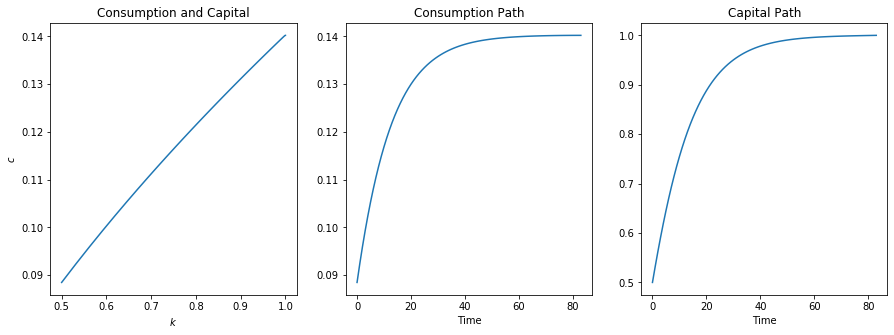

In [22]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(kvec, cvec)
axs[0].set_title('Consumption and Capital')
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$c$')

axs[1].plot(cvec)
axs[1].set_title('Consumption Path')
axs[1].set_xlabel('Time')

axs[2].plot(kvec)
axs[2].set_title('Capital Path')
axs[2].set_xlabel('Time')


plt.show()

Consumption and capital in the first 11 periods:

In [23]:
#Capital 
print(kvec[:11])

[0.5        0.53169661 0.56209997 0.59113037 0.61874035 0.64490887
 0.66963624 0.69293965 0.71484948 0.73540619 0.75465761]


In [24]:
#Consumption 
print(cvec[:11])

[0.08847783 0.09233613 0.09593659 0.09929031 0.10240944 0.10530663
 0.10799471 0.11048641 0.1127942  0.11493015 0.11690585]
